In [2]:
api_key = "14L0MwGavn2XZNhKf8A8ojstu"
api_key_secret = "UkzpPJcvVsk1DEndpkM75j4nVXoZmrMjefj3jKNyH6FDrEKzJV"
access_token = "1546836595130630145-C387ONFblGumqJAR3044IsHAIcu3tO"
access_token_secret = "RpfhbxLzIlEqFXg5StshkAVDveT9B0LyGEVz5hkf6OmoP"

In [3]:
import tweepy as tw
auth = tw.OAuthHandler(api_key , api_key_secret)
auth.set_access_token(access_token , access_token_secret)
api = tw.API(auth)

In [4]:
# Define the query
search_query = "#covid19"
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2022-07-14").items(1000)

In [5]:
# Retreive the tweets
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

Total Tweets fetched: 1000


In [6]:
# Populate the dataset
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

C:\Users\massi\AppData\Local\Temp\ipykernel_11012\1445611538.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,


In [7]:
tweets_df.head() # show the dataframe

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,मिशन कांशीराम,"New Delhi, India",We will openly do tere zulm ki mukhalifat tu t...,False,2022-07-15 09:58:29+00:00,RT @ndtv: #InPics | Tibetan spiritual leader @...,"[InPics, COVID19]",Twitter for Android
1,Take One,India,• News & Entertainment from India to the world...,False,2022-07-15 09:58:27+00:00,#MadhyaPradesh govt to hold campaign to admini...,"[MadhyaPradesh, COVID19]",TweetDeck
2,Johanna Hofinger,Tirol,Almhirtin\n\noamei foign hoast oiwei foign mia...,False,2022-07-15 09:58:19+00:00,RT @apsmunro: 🔥 New data from Italy 🇮🇹 \n\nLoo...,[COVID19],Twitter for Android
3,Ashu Putra,,,False,2022-07-15 09:58:10+00:00,RT @RajatUPSC1: This happens when you #Peacefu...,"[Peacefully, request, governmentofindia, girl,...",Twitter for Android
4,Joanne Allman,,"Ancient proverb:\n""The remedy is often worse t...",False,2022-07-15 09:58:09+00:00,RT @FreedomAllian11: #Vaccinepassports haven't...,"[Vaccinepassports, CovidPass]",Twitter Web App


In [8]:
# Drop duplicates
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}") # 4 duplicates 

all tweets: (1000, 8)


In [9]:
# Clean Text
import numpy as np
import re
import nltk
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('rt')
def clean_tweet(tweet):
    if type(tweet) == np.float_:
        return ""
    temp = tweet.lower()         # trasforma tutte le parole dei tweet in minuscolo
    temp = re.sub("'", "", temp) 
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Rimuove le menzioni
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # Rimuove gli #
    temp = re.sub(r'http\S+', '', temp)      # Rimuove i link
    temp = re.sub(r"www.\S+", "", temp)      # Rimuove i link
    temp = re.sub('[()!?]', ' ', temp)       # Rimuove la punteggiatura
    temp = re.sub('\[.*?\]',' ', temp)       # Rimuove la punteggiatura
    temp = re.sub("[^a-z0-9]"," ", temp)     # Rimuove i caratteri non alfanumerici
    temp = temp.split()                      
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

tweets = []
for word in tweets_df.text:
    tweets.append(word)

results = [clean_tweet(tw) for tw in tweets]

In [10]:
results

['tibetan spiritual leader arrives leh first visit outside dharamshala post',
 'govt hold campaign administer booster dose vaccine jul 21',
 'new data italy looks like children much higher antibody responses mild adults five',
 'happens see forced',
 'havent gone away according government needed venues events',
 'new data italy looks like children much higher antibody responses mild adults five',
 'new data italy looks like children much higher antibody responses mild adults five',
 'dream passenger cabins petri dishes airborne disease including denialism kills',
 'workplace sigh nobody cares health implications',
 'govt needs reconsider decision end paid pandemic leave discounted rats mask mandates regards mitigation covid spread best long term financial health decision strongly recommend reinstating policies',
 'los angeles 2 months time',
 'new data italy looks like children much higher antibody responses mild adults five',
 'vaccinated remission contracted january live',
 'japan pr

In [11]:
# Polarity
from textblob import TextBlob

In [12]:
TextBlob("I'm very happy").sentiment # example

Sentiment(polarity=1.0, subjectivity=1.0)

In [13]:
TextBlob('I love horror film').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [14]:
TextBlob("I'm sad").sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [15]:
def getSubjectivity(text):
    
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    
        return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
data_frame_text = pd.DataFrame(results)
data_frame_text.columns = ['Text']

In [17]:
data_frame_text

,Text
0,tibetan spiritual leader arrives leh first vis...
1,govt hold campaign administer booster dose vac...
2,new data italy looks like children much higher...
3,happens see forced
4,havent gone away according government needed v...
...,...
995,health minister mansukh mandaviya free booster...
996,health minister mansukh mandaviya free booster...
997,health minister mansukh mandaviya free booster...
998,health minister mansukh mandaviya free booster...


In [18]:
data_frame_text['Subjectivity'] = data_frame_text['Text'].apply(getSubjectivity) 

data_frame_text['Polarity'] = data_frame_text['Text'].apply(getPolarity) 

data_frame_text['Analysis'] = data_frame_text['Polarity'].apply(analysis)

In [19]:
data_frame_text.head() 

,Text,Subjectivity,Polarity,Analysis
0,tibetan spiritual leader arrives leh first vis...,0.172222,0.083333,Positive
1,govt hold campaign administer booster dose vac...,0.000000,0.000000,Neutral
2,new data italy looks like children much higher...,0.484848,0.239899,Positive
3,happens see forced,0.200000,-0.300000,Negative
4,havent gone away according government needed v...,0.000000,0.000000,Neutral


In [20]:
data_frame_text.Analysis.value_counts()

Positive    686
Neutral     207
Negative    107
Name: Analysis, dtype: int64

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

def visualize_word_freq(input_data,max_words,title_pre,tfidf=False):
   
    plt.style.use("ggplot")
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['figure.figsize'] = (20.0, 5.0)
    plt.rcParams['xtick.labelsize'] = 22
    
    if tfidf:
        vectorizer = TfidfVectorizer(max_features=max_words, min_df=10, max_df=0.7, use_idf=True)
        TITLE = title_pre+" - "+"(TFIDF)"
    else:
        vectorizer = CountVectorizer(max_features=max_words, min_df=10, max_df=0.7)
        TITLE = title_pre
        
    mat = vectorizer.fit_transform(input_data)
    
    pd.DataFrame(mat.sum(axis=0).T,
             index=vectorizer.get_feature_names_out(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).plot(kind='bar',title=TITLE)

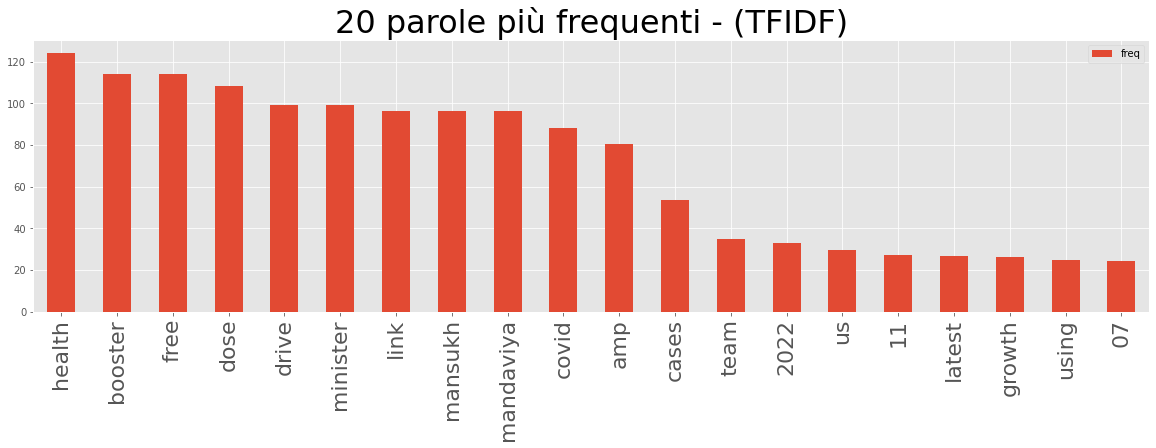

In [22]:
visualize_word_freq(data_frame_text['Text'], 20, "20 parole più frequenti", True)

In [23]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white', 
        max_words=20,
        max_font_size=40, 
        scale=3,
        random_state=1,
        collocations=False
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

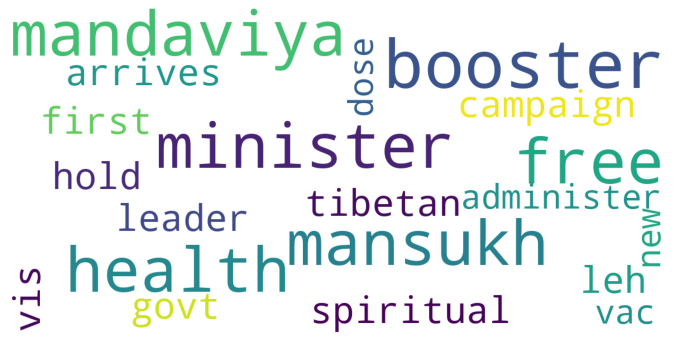

In [25]:
show_wordcloud(data_frame_text['Text'])